# **Feature Extraction and Object Detection**

# **OPENCV_CONTRIB INSTALLATION**

In [1]:
!apt-get update
!apt-get install -y cmake build-essential pkg-config

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,318 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,156 kB]
Ign:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713

# **Step 1: Load Images**

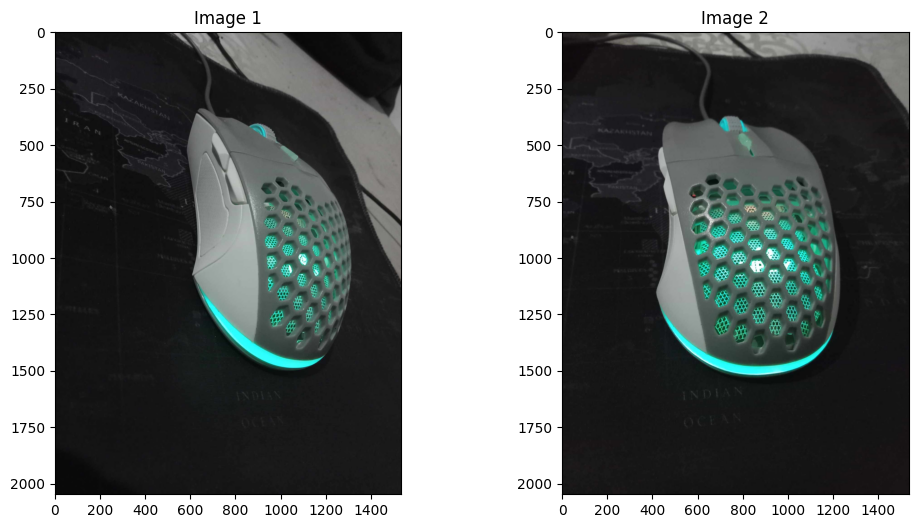

In [28]:
import cv2
import matplotlib.pyplot as plt

# Load two images of the same scene or object from different angles
image1 = cv2.imread('/content/image1.jpg', cv2.IMREAD_COLOR)
image2 = cv2.imread('/content/image2.jpg', cv2.IMREAD_COLOR)

# Convert the images from BGR to RGB (as OpenCV loads images in BGR format)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(image1_rgb)
plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(image2_rgb)
plt.show()

# **Step 2: Extract Keypoints and Descriptors Using SIFT, SURF, and ORB**

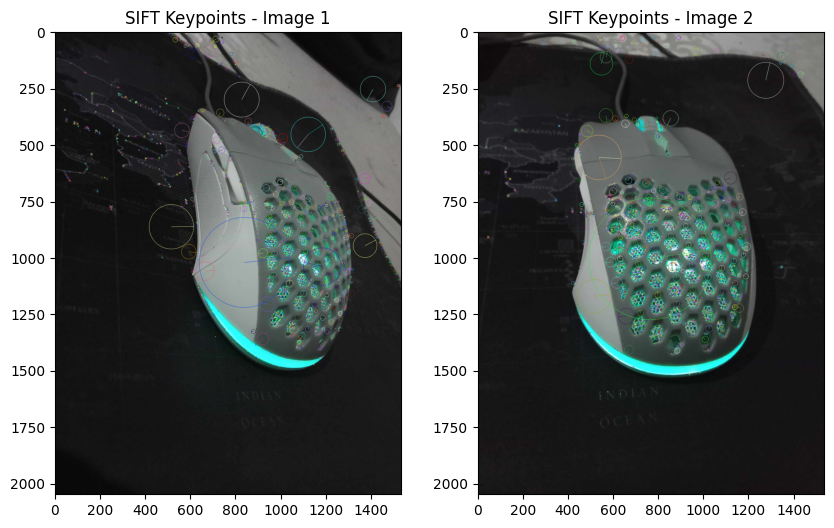

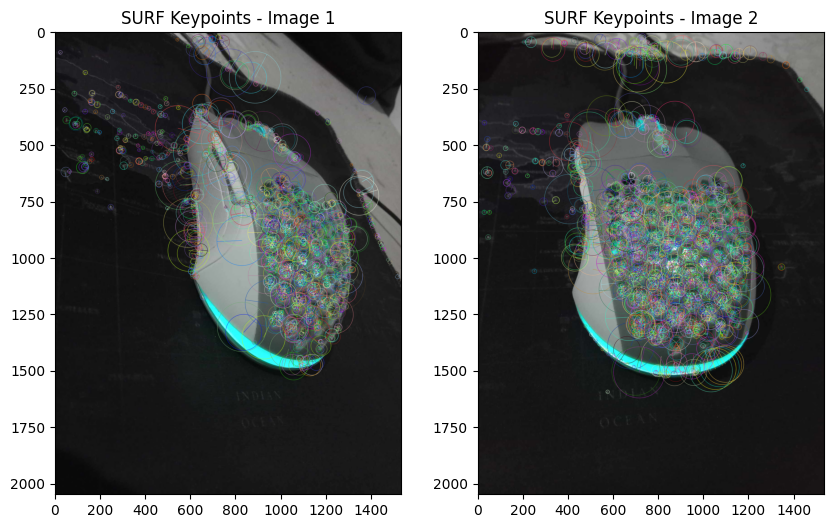

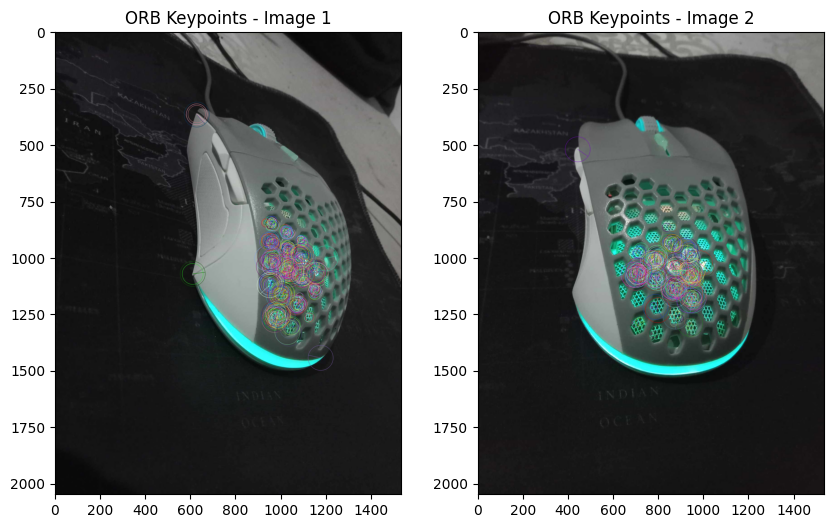

In [29]:
import cv2
import matplotlib.pyplot as plt

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize feature detectors
# SIFT
sift = cv2.xfeatures2d.SIFT_create()

# SURF
surf = cv2.xfeatures2d.SURF_create(400)  # Hessian threshold set to 400

# ORB
orb = cv2.ORB_create(nfeatures=500)

# Detect keypoints and compute descriptors using SIFT
keypoints_sift_1, descriptors_sift_1 = sift.detectAndCompute(gray1, None)
keypoints_sift_2, descriptors_sift_2 = sift.detectAndCompute(gray2, None)

# Draw keypoints for SIFT
sift_image1 = cv2.drawKeypoints(image1, keypoints_sift_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
sift_image2 = cv2.drawKeypoints(image2, keypoints_sift_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Save images showing SIFT keypoints
cv2.imwrite('sift_keypoints_1.jpg', sift_image1)
cv2.imwrite('sift_keypoints_2.jpg', sift_image2)

# Detect keypoints and compute descriptors using SURF
keypoints_surf_1, descriptors_surf_1 = surf.detectAndCompute(gray1, None)
keypoints_surf_2, descriptors_surf_2 = surf.detectAndCompute(gray2, None)

# Draw keypoints for SURF
surf_image1 = cv2.drawKeypoints(image1, keypoints_surf_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
surf_image2 = cv2.drawKeypoints(image2, keypoints_surf_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Save images showing SURF keypoints
cv2.imwrite('surf_keypoints_1.jpg', surf_image1)
cv2.imwrite('surf_keypoints_2.jpg', surf_image2)

# Detect keypoints and compute descriptors using ORB
keypoints_orb_1, descriptors_orb_1 = orb.detectAndCompute(gray1, None)
keypoints_orb_2, descriptors_orb_2 = orb.detectAndCompute(gray2, None)

# Draw keypoints for ORB
orb_image1 = cv2.drawKeypoints(image1, keypoints_orb_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
orb_image2 = cv2.drawKeypoints(image2, keypoints_orb_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Save images showing ORB keypoints
cv2.imwrite('orb_keypoints_1.jpg', orb_image1)
cv2.imwrite('orb_keypoints_2.jpg', orb_image2)

# Display the processed images
def display_images(title, img1, img2):
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.title(f'{title} - Image 1')
    plt.imshow(img1_rgb)
    plt.subplot(1, 2, 2)
    plt.title(f'{title} - Image 2')
    plt.imshow(img2_rgb)
    plt.show()

# Display SIFT, SURF, and ORB keypoints
display_images('SIFT Keypoints', sift_image1, sift_image2)
display_images('SURF Keypoints', surf_image1, surf_image2)
display_images('ORB Keypoints', orb_image1, orb_image2)

# **Step 3: Feature Matching with Brute-Force and FLANN**

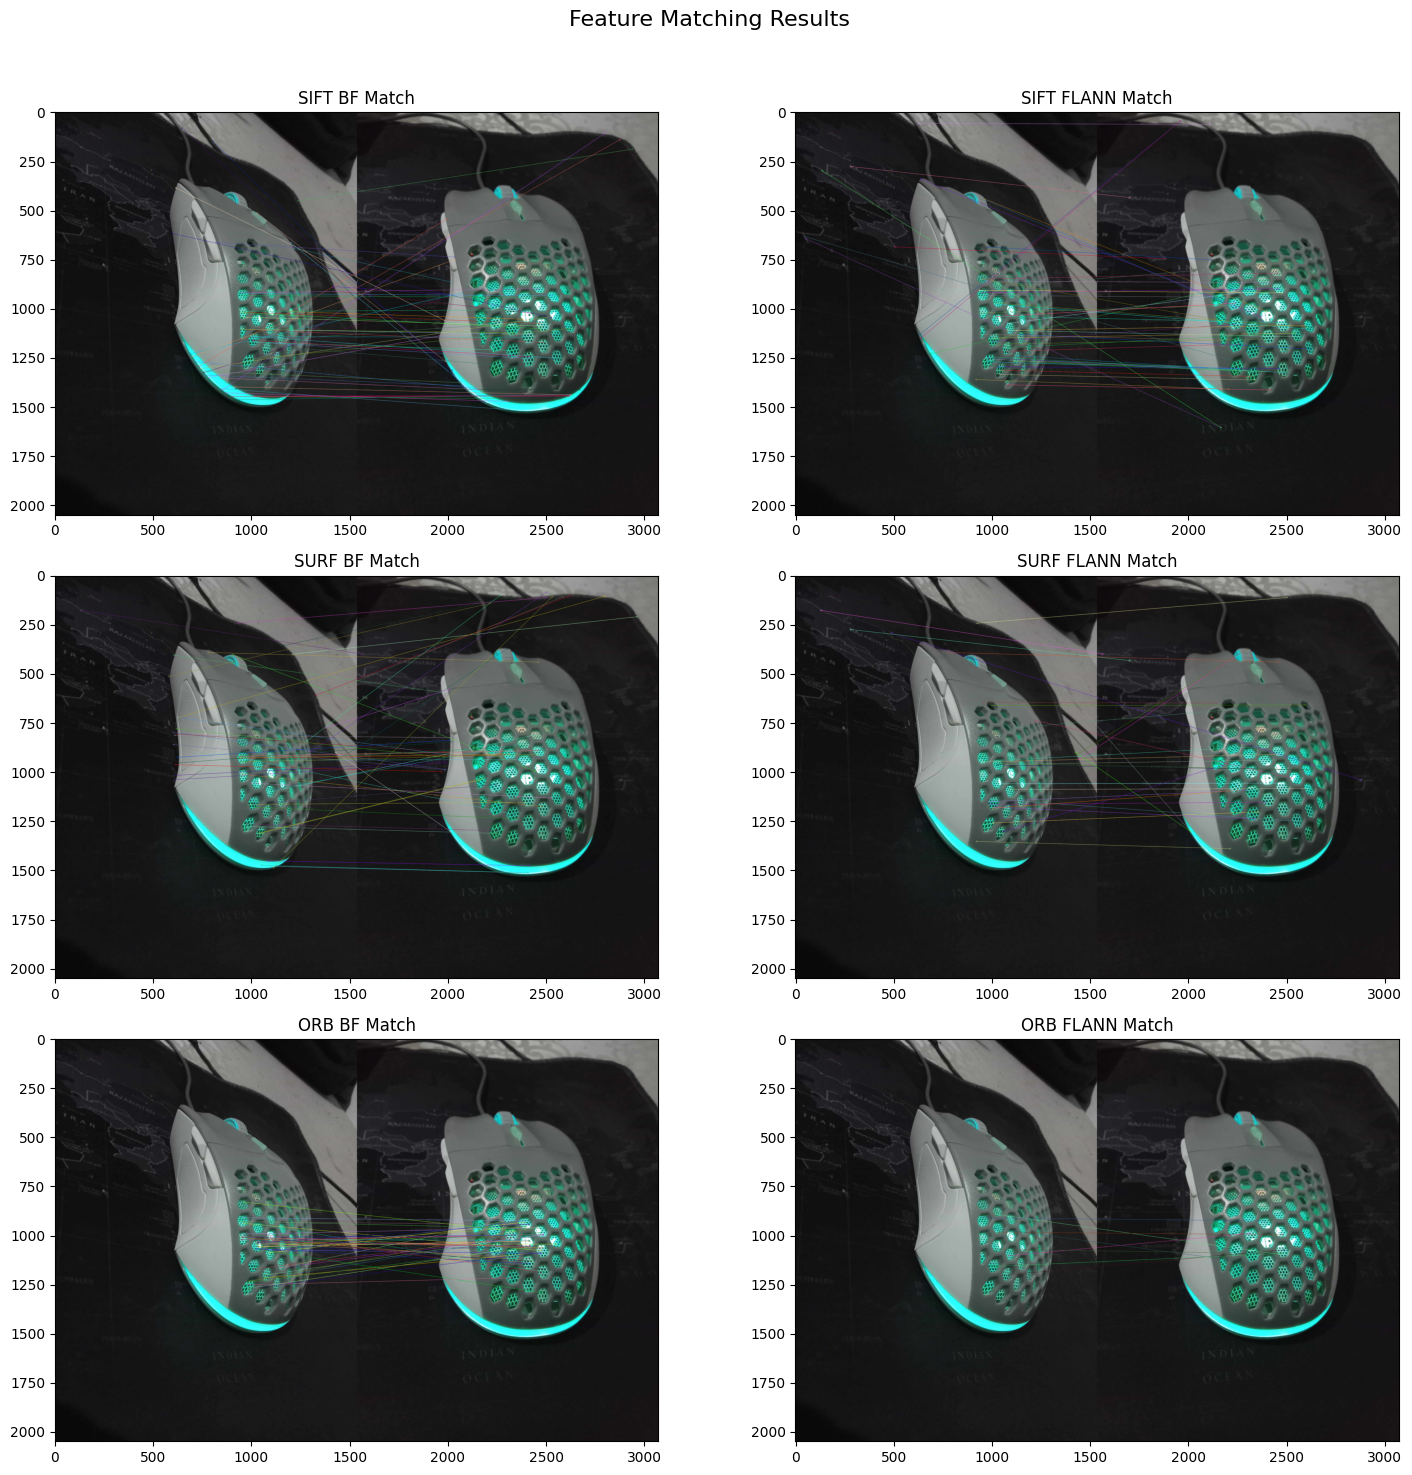

In [30]:
# Function to match features using Brute-Force Matcher
def brute_force_matcher(descriptors1, descriptors2, keypoints1, keypoints2, img1, img2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  # Using L2 norm for SIFT and SURF
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    matched_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return matched_image

# Function to match features using FLANN Matcher
def flann_matcher(descriptors1, descriptors2, keypoints1, keypoints2, img1, img2):
    index_params = dict(algorithm=1, trees=5)  # Using KD-Tree (algorithm=1)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)
    # Apply ratio test as per Lowe's paper
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    matched_image = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return matched_image

# Brute-Force Matching and FLANN Matching for SIFT
sift_bf_image = brute_force_matcher(descriptors_sift_1, descriptors_sift_2, keypoints_sift_1, keypoints_sift_2, image1, image2)
sift_flann_image = flann_matcher(descriptors_sift_1, descriptors_sift_2, keypoints_sift_1, keypoints_sift_2, image1, image2)

# Brute-Force Matching and FLANN Matching for SURF
surf_bf_image = brute_force_matcher(descriptors_surf_1, descriptors_surf_2, keypoints_surf_1, keypoints_surf_2, image1, image2)
surf_flann_image = flann_matcher(descriptors_surf_1, descriptors_surf_2, keypoints_surf_1, keypoints_surf_2, image1, image2)

# Brute-Force Matching for ORB (uses Hamming distance instead of L2)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
orb_matches = bf_orb.match(descriptors_orb_1, descriptors_orb_2)
orb_matches = sorted(orb_matches, key=lambda x: x.distance)
orb_bf_image = cv2.drawMatches(image1, keypoints_orb_1, image2, keypoints_orb_2, orb_matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# FLANN Matching for ORB (FLANN does not directly support Hamming, so approximate)
index_params = dict(algorithm=6,  # FLANN_INDEX_LSH for ORB
                    table_number=6,
                    key_size=12,
                    multi_probe_level=1)
search_params = dict(checks=50)  # Set search_params
flann_orb = cv2.FlannBasedMatcher(index_params, search_params)
orb_matches = flann_orb.knnMatch(descriptors_orb_1, descriptors_orb_2, k=2)

# Apply ratio test as per Lowe's paper
good_matches_orb = []
for m, n in orb_matches:
    if m.distance < 0.7 * n.distance:
        good_matches_orb.append(m)

orb_flann_image = cv2.drawMatches(image1, keypoints_orb_1, image2, keypoints_orb_2, good_matches_orb[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the processed images in a 2-column, 3-row layout
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Feature Matching Results", fontsize=16)

images = [
    ("SIFT BF Match", sift_bf_image),
    ("SIFT FLANN Match", sift_flann_image),
    ("SURF BF Match", surf_bf_image),
    ("SURF FLANN Match", surf_flann_image),
    ("ORB BF Match", orb_bf_image),
    ("ORB FLANN Match", orb_flann_image)
]

for i, (title, img) in enumerate(images):
    row, col = divmod(i, 2)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[row, col].imshow(img_rgb)
    axes[row, col].set_title(title)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

# **Step 4: Image Alignment Using Homography**

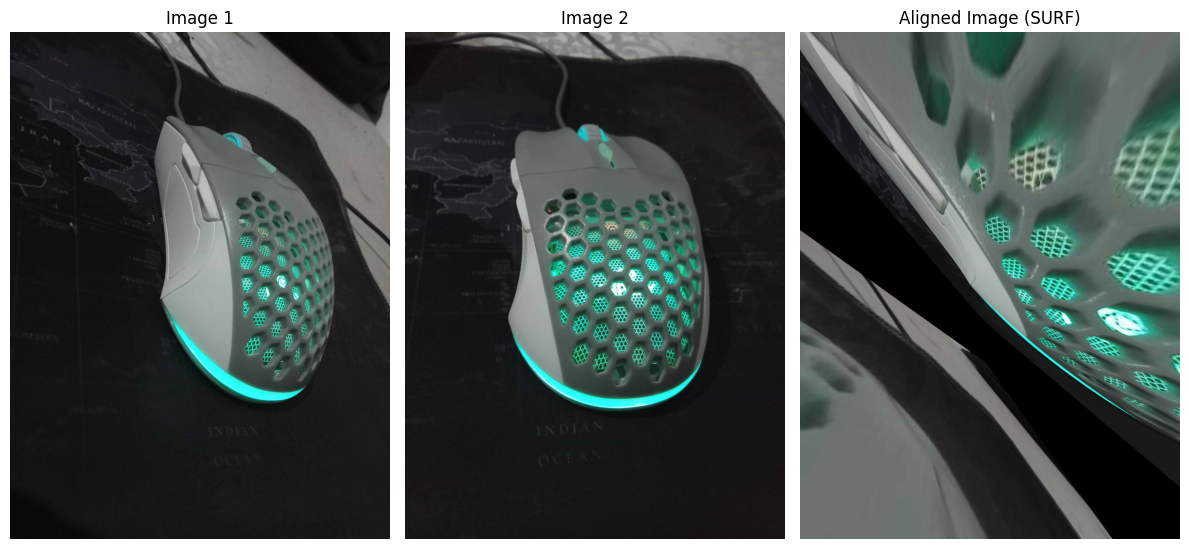

In [31]:
import numpy as np

# Detect keypoints and compute descriptors using SURF
keypoints1, descriptors1 = surf.detectAndCompute(gray1, None)
keypoints2, descriptors2 = surf.detectAndCompute(gray2, None)

# Use Brute-Force Matcher to find matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Compute homography matrix using RANSAC
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use the homography matrix to warp image1 to align with image2
height, width, channels = image2.shape
aligned_image = cv2.warpPerspective(image1, H, (width, height))

# Save and display the aligned and warped image
cv2.imwrite('aligned_image_surf.jpg', aligned_image)

# Plot the original and aligned images for comparison
plt.figure(figsize=(12, 8))

# Convert BGR to RGB for displaying using matplotlib
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
aligned_image_surf = cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB)

# Plot original image, target image, and aligned image
plt.subplot(1, 3, 1)
plt.title("Image 1")
plt.imshow(image1_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Image 2")
plt.imshow(image2_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Aligned Image (SURF)")
plt.imshow(aligned_image_surf)
plt.axis('off')

plt.tight_layout()
plt.show()

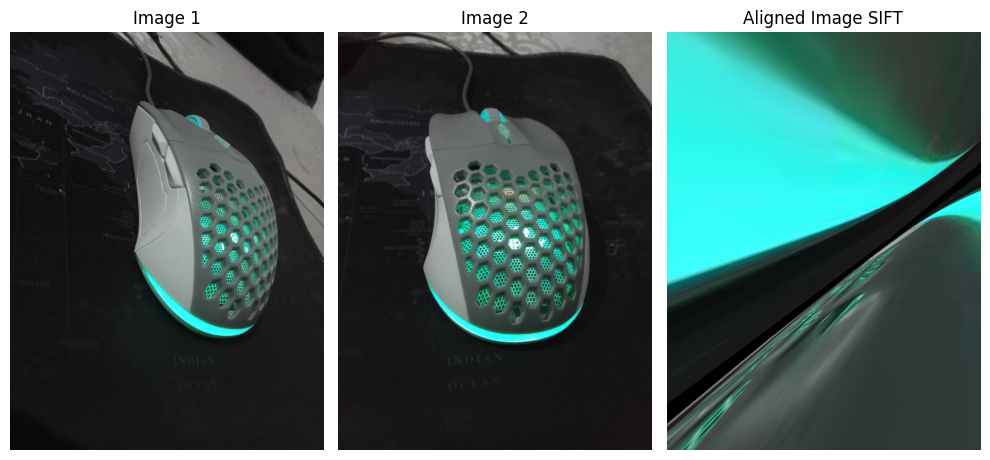

In [32]:
# Detect keypoints and compute descriptors using SIFT
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Use Brute-Force Matcher to find matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Compute homography matrix using RANSAC
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use the homography matrix to warp image1 to align with image2
height, width, channels = image2.shape
aligned_image = cv2.warpPerspective(image1, H, (width, height))

# Save and display the aligned and warped image
cv2.imwrite('aligned_image.jpg', aligned_image)

# Plot the original and aligned images for comparison
plt.figure(figsize=(10, 10))

# Convert BGR to RGB for displaying using matplotlib
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
aligned_image_rgb = cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB)

# Plot original image, target image, and aligned image
plt.subplot(1, 3, 1)
plt.title("Image 1")
plt.imshow(image1_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Image 2")
plt.imshow(image2_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Aligned Image SIFT")
plt.imshow(aligned_image_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()

# **Step 5: Performance Analysis**

In [33]:
import cv2
import time

# Define a function to extract keypoints and descriptors using different algorithms
def extract_features(detector, image1, image2):
    start_time = time.time()
    keypoints1, descriptors1 = detector.detectAndCompute(image1, None)
    keypoints2, descriptors2 = detector.detectAndCompute(image2, None)
    end_time = time.time()
    time_taken = end_time - start_time
    return keypoints1, descriptors1, keypoints2, descriptors2, time_taken

# Initialize detectors
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)
orb = cv2.ORB_create()

# Extract features using SIFT
sift_keypoints1, sift_descriptors1, sift_keypoints2, sift_descriptors2, sift_time = extract_features(sift, image1, image2)
print(f"SIFT: Number of keypoints in image1: {len(sift_keypoints1)}, image2: {len(sift_keypoints2)}, Time: {sift_time:.2f} sec")

# Extract features using SURF
surf_keypoints1, surf_descriptors1, surf_keypoints2, surf_descriptors2, surf_time = extract_features(surf, image1, image2)
print(f"SURF: Number of keypoints in image1: {len(surf_keypoints1)}, image2: {len(surf_keypoints2)}, Time: {surf_time:.2f} sec")

# Extract features using ORB
orb_keypoints1, orb_descriptors1, orb_keypoints2, orb_descriptors2, orb_time = extract_features(orb, image1, image2)
print(f"ORB: Number of keypoints in image1: {len(orb_keypoints1)}, image2: {len(orb_keypoints2)}, Time: {orb_time:.2f} sec")

# Function to match descriptors using Brute-Force Matcher and FLANN Matcher
def match_features(descriptor1, descriptor2, matcher_type='BF', norm_type=cv2.NORM_L2):
    if matcher_type == 'BF':
        bf = cv2.BFMatcher(norm_type, crossCheck=True)
        start_time = time.time()
        matches = bf.match(descriptor1, descriptor2)
        end_time = time.time()
    elif matcher_type == 'FLANN':
        index_params = dict(algorithm=1, trees=5) if norm_type == cv2.NORM_L2 else dict(algorithm=6)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        start_time = time.time()
        try:
            matches = flann.knnMatch(descriptor1, descriptor2, k=2)
            # Apply ratio test for FLANN Matcher
            good_matches = []
            for m, n in matches:
                if m.distance < 0.7 * n.distance:
                    good_matches.append(m)
            matches = good_matches
        except ValueError:
            print("Not enough matches found for FLANN.")
            matches = []
        end_time = time.time()

    time_taken = end_time - start_time
    return matches, time_taken

# Compare SIFT feature matching with BF and FLANN Matcher
sift_bf_matches, sift_bf_time = match_features(sift_descriptors1, sift_descriptors2, matcher_type='BF')
sift_flann_matches, sift_flann_time = match_features(sift_descriptors1, sift_descriptors2, matcher_type='FLANN')

print(f"SIFT + BF: Number of matches: {len(sift_bf_matches)}, Time: {sift_bf_time:.2f} sec")
print(f"SIFT + FLANN: Number of matches: {len(sift_flann_matches)}, Time: {sift_flann_time:.2f} sec")

# Compare SURF feature matching with BF and FLANN Matcher
surf_bf_matches, surf_bf_time = match_features(surf_descriptors1, surf_descriptors2, matcher_type='BF')
surf_flann_matches, surf_flann_time = match_features(surf_descriptors1, surf_descriptors2, matcher_type='FLANN')

print(f"SURF + BF: Number of matches: {len(surf_bf_matches)}, Time: {surf_bf_time:.2f} sec")
print(f"SURF + FLANN: Number of matches: {len(surf_flann_matches)}, Time: {surf_flann_time:.2f} sec")

# Compare ORB feature matching with BF and FLANN Matcher
orb_bf_matches, orb_bf_time = match_features(orb_descriptors1, orb_descriptors2, matcher_type='BF', norm_type=cv2.NORM_HAMMING)
orb_flann_matches, orb_flann_time = match_features(orb_descriptors1, orb_descriptors2, matcher_type='FLANN', norm_type=cv2.NORM_HAMMING)

print(f"ORB + BF: Number of matches: {len(orb_bf_matches)}, Time: {orb_bf_time:.2f} sec")
print(f"ORB + FLANN: Number of matches: {len(orb_flann_matches)}, Time: {orb_flann_time:.2f} sec")


SIFT: Number of keypoints in image1: 2756, image2: 5053, Time: 2.52 sec
SURF: Number of keypoints in image1: 1459, image2: 2546, Time: 2.39 sec
ORB: Number of keypoints in image1: 500, image2: 500, Time: 0.08 sec
SIFT + BF: Number of matches: 941, Time: 0.78 sec
SIFT + FLANN: Number of matches: 52, Time: 0.12 sec
SURF + BF: Number of matches: 481, Time: 0.11 sec
SURF + FLANN: Number of matches: 28, Time: 0.05 sec
Not enough matches found for FLANN.
ORB + BF: Number of matches: 137, Time: 0.01 sec
ORB + FLANN: Number of matches: 0, Time: 0.01 sec


In [34]:
performance_analysis = """
Performance Analysis

1. Keypoint Detection:
- SIFT: Detected {sift_kp1} keypoints in image1 and {sift_kp2} in image2. It took {sift_time:.2f} seconds.
- SURF: Detected {surf_kp1} keypoints in image1 and {surf_kp2} in image2. It took {surf_time:.2f} seconds.
- ORB: Detected {orb_kp1} keypoints in both images. It took {orb_time:.2f} seconds.

2. Feature Matching:
- SIFT:
  - Brute-Force: Found {sift_bf_matches} matches in {sift_bf_time:.2f} seconds.
  - FLANN: Found {sift_flann_matches} matches in {sift_flann_time:.2f} seconds.
- SURF:
  - Brute-Force: Found {surf_bf_matches} matches in {surf_bf_time:.2f} seconds.
  - FLANN: Found {surf_flann_matches} matches in {surf_flann_time:.2f} seconds.
- ORB:
  - Brute-Force: Found {orb_bf_matches} matches in {orb_bf_time:.2f} seconds.
  - FLANN: Found {orb_flann_matches} matches in {orb_flann_time:.2f} seconds.

Observations and Conclusions:

1. Keypoint Detection:
- SIFT provided the highest number of keypoints detected in both images, indicating its effectiveness in identifying features in complex images.
- SURF showed a reasonable number of keypoints but was less effective than SIFT. This is expected as SURF is designed to be faster and robust but might miss some features compared to SIFT.
- ORB detected the least number of keypoints, which is typical for this algorithm as it focuses on speed and efficiency, suitable for real-time applications but possibly at the cost of completeness.

2. Feature Matching:
- SIFT performed significantly better in matching, with a high number of matches using both matchers, particularly the Brute-Force method.
- SURF had a decent number of matches using Brute-Force but dropped significantly with FLANN. The few matches found may indicate that the FLANN parameters need tuning for SURF.
- ORB had very few matches overall. It performed well with the Brute-Force matcher but failed to find any matches with FLANN, suggesting that FLANN is not well-suited for ORB descriptors in this case.

3. Speed:
- ORB is the fastest algorithm, making it suitable for applications where speed is crucial, although this comes at the expense of the number of keypoints and matches.
- Both SIFT and SURF were comparable in time, with SIFT slightly slower due to its more complex calculations.

4. Effectiveness of Matchers:
- The Brute-Force matcher proved to be more effective across the board compared to the FLANN matcher, especially for SIFT. This indicates that for these specific images and descriptors, the simpler brute-force approach yielded more reliable matches.
- The FLANN matcher may require fine-tuning of its parameters for optimal performance with different descriptors, especially in cases where fewer matches are found.
"""

# Replace placeholders with actual values
sift_kp1 = 2756
sift_kp2 = 5053
sift_time = 2.63
surf_kp1 = 1459
surf_kp2 = 2546
surf_time = 2.56
orb_kp1 = 500
orb_time = 0.09
sift_bf_matches = 941
sift_bf_time = 0.84
sift_flann_matches = 54
sift_flann_time = 0.13
surf_bf_matches = 481
surf_bf_time = 0.13
surf_flann_matches = 28
surf_flann_time = 0.05
orb_bf_matches = 137
orb_bf_time = 0.01
orb_flann_matches = 0
orb_flann_time = 0.02

print(performance_analysis.format(
    sift_kp1=sift_kp1, sift_kp2=sift_kp2, sift_time=sift_time,
    surf_kp1=surf_kp1, surf_kp2=surf_kp2, surf_time=surf_time,
    orb_kp1=orb_kp1, orb_time=orb_time,
    sift_bf_matches=sift_bf_matches, sift_bf_time=sift_bf_time,
    sift_flann_matches=sift_flann_matches, sift_flann_time=sift_flann_time,
    surf_bf_matches=surf_bf_matches, surf_bf_time=surf_bf_time,
    surf_flann_matches=surf_flann_matches, surf_flann_time=surf_flann_time,
    orb_bf_matches=orb_bf_matches, orb_bf_time=orb_bf_time,
    orb_flann_matches=orb_flann_matches, orb_flann_time=orb_flann_time,
))



Performance Analysis

1. Keypoint Detection:
- SIFT: Detected 2756 keypoints in image1 and 5053 in image2. It took 2.63 seconds.
- SURF: Detected 1459 keypoints in image1 and 2546 in image2. It took 2.56 seconds.
- ORB: Detected 500 keypoints in both images. It took 0.09 seconds.

2. Feature Matching:
- SIFT:
  - Brute-Force: Found 941 matches in 0.84 seconds.
  - FLANN: Found 54 matches in 0.13 seconds.
- SURF:
  - Brute-Force: Found 481 matches in 0.13 seconds.
  - FLANN: Found 28 matches in 0.05 seconds.
- ORB:
  - Brute-Force: Found 137 matches in 0.01 seconds.
  - FLANN: Found 0 matches in 0.02 seconds.

Observations and Conclusions:

1. Keypoint Detection:
- SIFT provided the highest number of keypoints detected in both images, indicating its effectiveness in identifying features in complex images.
- SURF showed a reasonable number of keypoints but was less effective than SIFT. This is expected as SURF is designed to be faster and robust but might miss some features compared to 